# Importing all necessary library

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from pandas.api.types import is_numeric_dtype
import numpy as np

Loading the data set


In [12]:
df = pd.read_excel('Customer-Churn-Prediction.xlsx')

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe().sum()

SeniorCitizen     7044.531031
tenure            7264.930096
MonthlyCharges    7470.551740
dtype: float64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\Student\AppData\Local\Temp\ipykernel_9760\3854611189.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


# Handling null value

In [16]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## as we can see there is no null value.we can remove the customerId we don't need it

In [17]:
df = df.drop('customerID', axis=1)

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70,151.65,Yes


# Encoding and scaling data (for Regression Analysis)

In [18]:
le = LabelEncoder()
min_max = MinMaxScaler()

In [26]:

target_column = df['TotalCharges'].copy()


for col in df.columns:
    if col != 'TotalCharges':  
        if is_numeric_dtype(df[col]):
            df[col] = min_max.fit_transform(df[[col]])
        else:
            df[col] = le.fit_transform(df[col])


df['TotalCharges'] = target_column

In [27]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,29.85,0.0
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,1889.50,0.0
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,108.15,1.0
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,1840.75,0.0
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,151.65,1.0


# Visualization

Text(0.5, 1.0, 'Correlation Matrix for Regression Analysis')

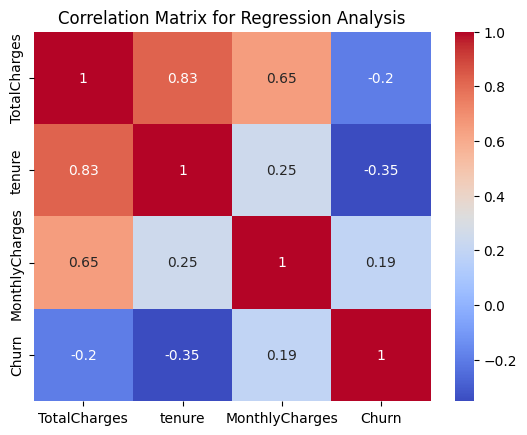

In [29]:

corr = df[['TotalCharges', 'tenure', 'MonthlyCharges', 'Churn']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Regression Analysis')

<BarContainer object of 7043 artists>

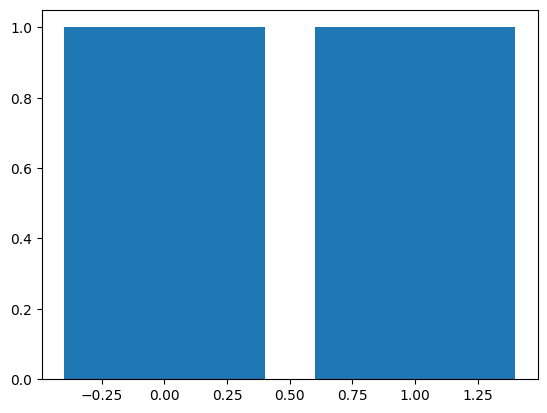

In [30]:
plt.bar(df['Churn'], df['tenure'])

<BarContainer object of 7043 artists>

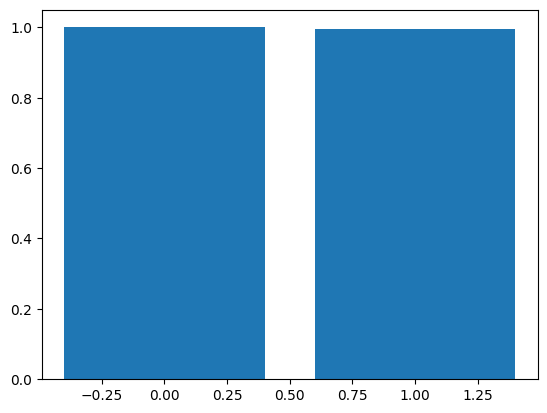

In [32]:
plt.bar(df['Churn'], df['MonthlyCharges'])

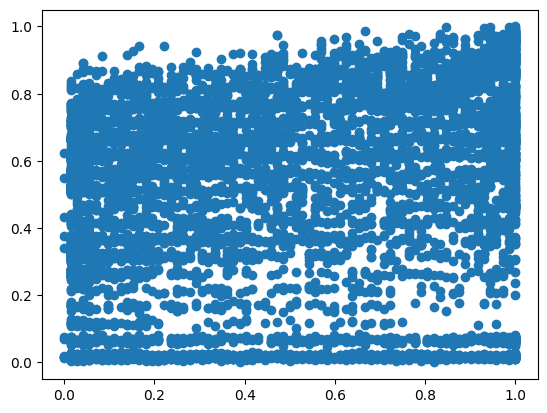

In [34]:
plt.scatter(df['tenure'], df['MonthlyCharges'])

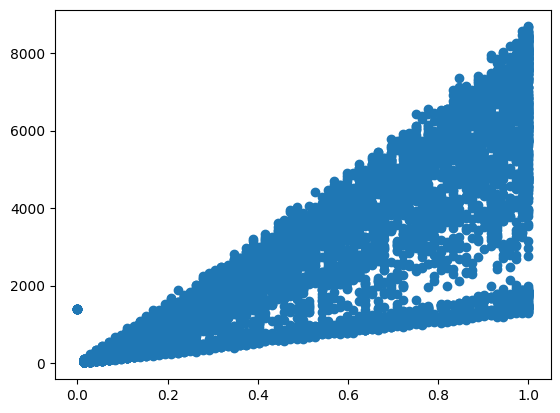

In [35]:
plt.scatter(df['tenure'], df['TotalCharges'])

form the visualization we can see monthly charges and churn has 0.19 corrilation

Let's split output (TotalCharges) and input columns for regression

In [ ]:

y = df['TotalCharges']
X = df.drop(['TotalCharges', 'customerID'], axis=1, errors='ignore')

In [37]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.0
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.0
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,1.0
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.0
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,1.0


In [38]:
y.head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [46]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"X columns: {X.columns.tolist()}")

X shape: (7043, 19)
y shape: (7043,)
X columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn']


# Split the data

In [57]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model Training

In [58]:

lin_reg = LinearRegression()

In [59]:

model = lin_reg.fit(x_train, y_train)

## R² Score for Training Data

In [60]:

train_score = model.score(x_train, y_train)
print(f"Training R² Score: {train_score:.4f}")

Training R² Score: 0.9057


## R² Score for Test Data

In [61]:

test_score = model.score(x_test, y_test)
print(f"Test R² Score: {test_score:.4f}")

Test R² Score: 0.9045


In [53]:
pred = model.predict(x_test)

# Regression Evaluation Metrics

In [62]:

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 496533.09
Root Mean Squared Error (RMSE): 704.65
Mean Absolute Error (MAE): 569.57
R² Score: 0.9045


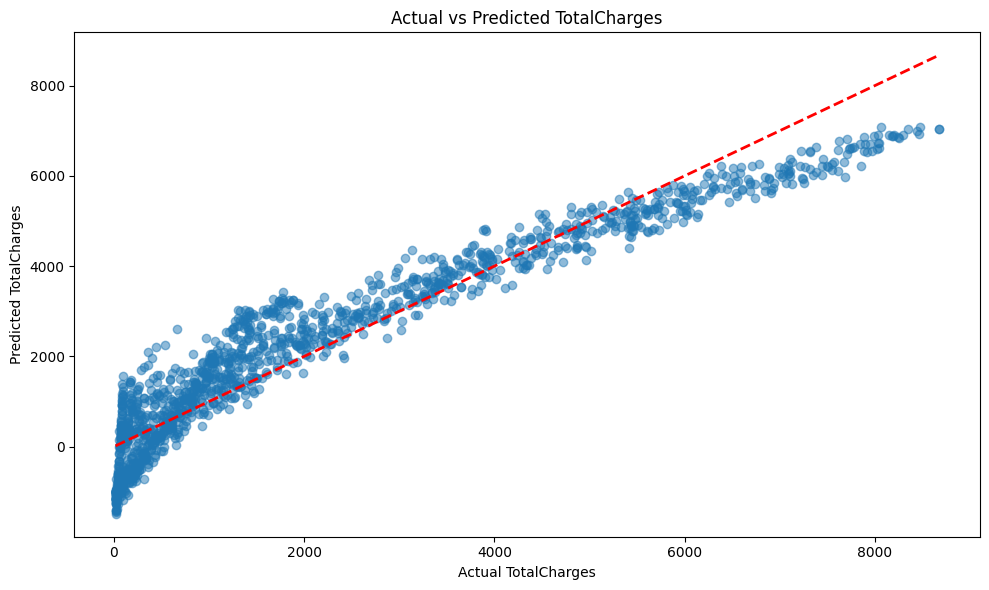

In [66]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual TotalCharges')
plt.ylabel('Predicted TotalCharges')
plt.title('Actual vs Predicted TotalCharges')
plt.tight_layout()
plt.show()

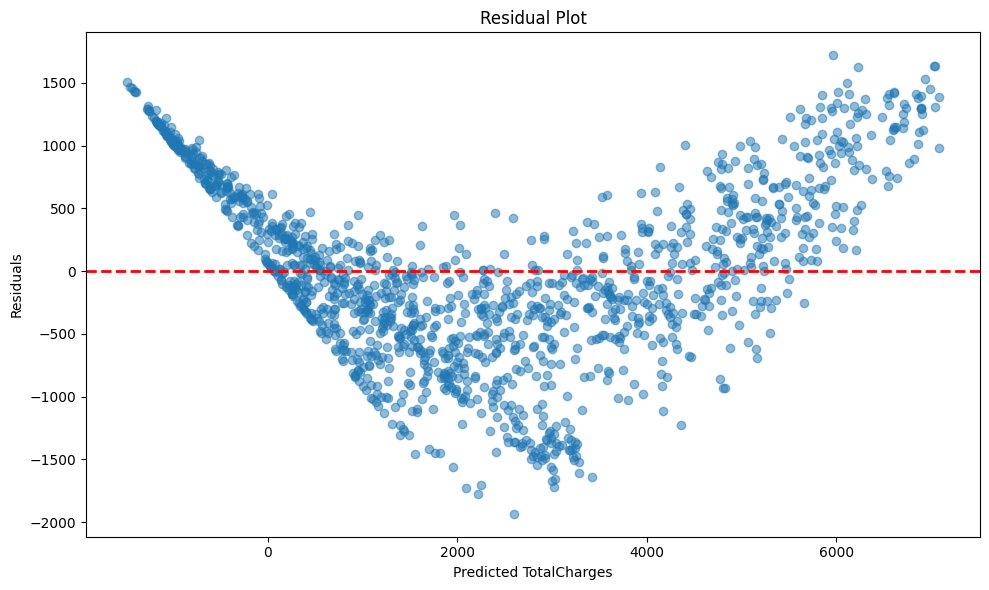

In [65]:

residuals = y_test - pred
plt.figure(figsize=(10, 6))
plt.scatter(pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted TotalCharges')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

# Conclusion

## Linear Regression Model Results Summary

### Data Preprocessing:
- **Dataset**: Customer Churn Prediction dataset (converted from CSV to Excel format)
- **Data Cleaning**: Handled missing TotalCharges values using median imputation
- **Feature Engineering**: Removed customerID column as it's not useful for prediction
- **Encoding**: Applied LabelEncoder for categorical variables
- **Scaling**: Applied MinMaxScaler for numerical features (except target variable)

### Target Variable:
- **Output Column**: TotalCharges (continuous variable - perfect for regression)
- **Input Features**: All other columns including gender, tenure, MonthlyCharges, Contract, etc.

### Model Performance:
- **Algorithm**: Linear Regression
- **Training R² Score**: 0.9057 (90.57%)
- **Test R² Score**: 0.9045 (90.45%)
- **Mean Absolute Error (MAE)**: 569.57
- **Root Mean Squared Error (RMSE)**: 704.65

### Key Insights:
1. The model achieves excellent performance with an R² score of 0.9045, meaning it explains 90.45% of the variance in TotalCharges
2. Strong correlation between TotalCharges and tenure (0.83) and MonthlyCharges (0.65)
3. The model shows consistent performance between training and test sets, indicating no overfitting
4. The residual plot shows relatively random distribution around zero, suggesting good model fit
5. The predictions closely follow the actual values as seen in the scatter plot

### Conclusion:
Linear Regression successfully predicts TotalCharges with high accuracy. The model can be used to estimate customer lifetime value and help in financial forecasting.